# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import QuantileTransformer, MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report


# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [10]:
df = pd.read_csv("klasifikasi_dataset.csv")

display(df.info())
display(df.head())
display(df['Cluster'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           10000 non-null  float64
 1   Workout Duration (mins)       10000 non-null  float64
 2   Calories Burned               10000 non-null  float64
 3   Heart Rate (bpm)              10000 non-null  float64
 4   Steps Taken                   10000 non-null  float64
 5   Distance (km)                 10000 non-null  float64
 6   Sleep Hours                   10000 non-null  float64
 7   Daily Calories Intake         10000 non-null  float64
 8   Resting Heart Rate (bpm)      10000 non-null  float64
 9   BMI                           10000 non-null  float64
 10  Calories Burned per Minute    10000 non-null  float64
 11  Steps per Minute              10000 non-null  float64
 12  Steps per Km                  10000 non-null  float64
 13  Wo

None

,Age,Workout Duration (mins),Calories Burned,Heart Rate (bpm),Steps Taken,Distance (km),Sleep Hours,Daily Calories Intake,Resting Heart Rate (bpm),BMI,...,Workout Intensity_Low,Workout Intensity_Medium,Mood Before Workout_Happy,Mood Before Workout_Neutral,Mood Before Workout_Stressed,Mood Before Workout_Tired,Mood After Workout_Energized,Mood After Workout_Fatigued,Mood After Workout_Neutral,Cluster
0,38.0,64.191338,551.448891,129.0,10258.273060,7.961198,7.000000,2745.096438,70.0,27.847974,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4
1,38.0,65.000000,549.311079,129.0,10306.467548,7.865230,7.000000,2749.667018,70.0,27.774016,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,38.0,64.017717,551.507535,129.0,10250.181755,7.968540,7.066211,2744.430525,70.0,27.858602,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4
3,39.0,65.000000,555.000000,130.0,10529.182876,7.775495,6.900000,2755.903512,69.0,27.704780,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4,39.0,66.000000,544.000000,130.0,10297.225771,7.746647,6.986215,2752.230811,70.0,27.734599,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5


Cluster
3    2226
1    2201
0    2168
2    1143
4    1136
5    1126
Name: count, dtype: int64

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [11]:
# Memisahkan fitur dan target
X = df.drop('Cluster', axis=1)
y = df['Cluster']

# Menskalakan data agar terdistribusi normal
scaler = MinMaxScaler()
X_array = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_array, columns=X.columns)

quantile_transformer = QuantileTransformer(output_distribution='normal')
X_scaled = quantile_transformer.fit_transform(X_scaled)

In [14]:
# Lakukan data splitting
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Melihat distribusi kelas
counter_sorted = dict(sorted(Counter(y).items()))
print("Distribusi kelas sebelum SMOTE:", counter_sorted)

Distribusi kelas sebelum SMOTE: {0: 2168, 1: 2201, 2: 1143, 3: 2226, 4: 1136, 5: 1126}


In [ ]:
# Inisialisasi SMOTE
smote = SMOTE(random_state=42)

# Melakukan oversampling
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Melihat distribusi kelas setelah SMOTE
counter_sorted = dict(sorted(Counter(y_train_resampled).items()))
print("Distribusi kelas setelah SMOTE:", counter_sorted)

Distribusi kelas setelah SMOTE: {0: 1781, 1: 1781, 2: 1781, 3: 1781, 4: 1781, 5: 1781}


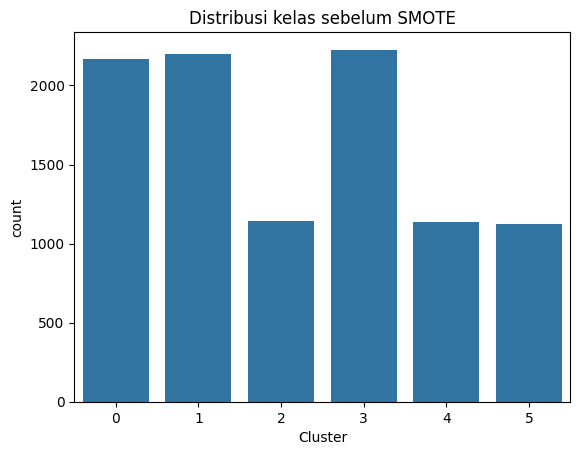

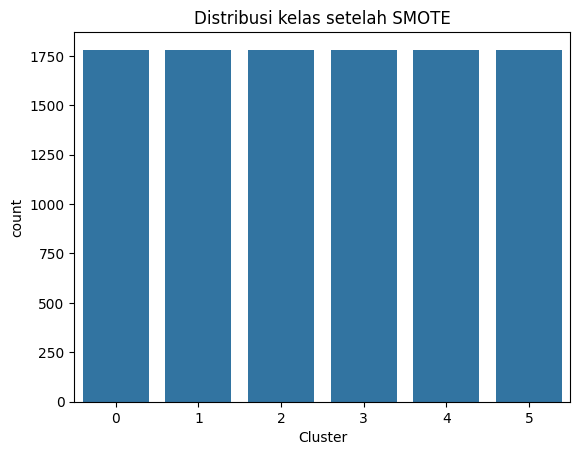

In [ ]:
# Membuat visualisasi distribusi kelas sebelum dan setelah SMOTE
sns.countplot(x='Cluster', data=df)
plt.title("Distribusi kelas sebelum SMOTE")
plt.show()

sns.countplot(x=y_train_resampled)
plt.title("Distribusi kelas setelah SMOTE")
plt.show()

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

**Algoritma klasifikasi yang dipakai**
   - SVM
   - Decision Tree 
   - Random Forest 
   - K-Nearest Neighbors (KNN)
   - naive bayes

In [19]:
# Latih model menggunakan SVM
svm = SVC().fit(X_train_resampled, y_train_resampled)

# Latih model menggunakan Decision Tree
dt = DecisionTreeClassifier().fit(X_train_resampled, y_train_resampled)

#Latih model menggunakan Random Forest
rf = RandomForestClassifier().fit(X_train_resampled, y_train_resampled)

# Latih model menggunakan KNN
knn = KNeighborsClassifier().fit(X_train_resampled, y_train_resampled)

# Latih model menggunakan Naive Bayes
nb = GaussianNB().fit(X_train_resampled, y_train_resampled)


Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [21]:
# Evaluasi hasil model dan visualisasikan

# SVM
y_pred_svm = svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='macro')
recall_svm = recall_score(y_test, y_pred_svm, average='macro')
f1_svm = f1_score(y_test, y_pred_svm, average='macro')

# Decision Tree 
y_pred_dt = dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt) 
precision_dt = precision_score(y_test, y_pred_dt, average='macro')
recall_dt = recall_score(y_test, y_pred_dt, average='macro')
f1_dt = f1_score(y_test, y_pred_dt, average='macro')

# Random Forest 
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='macro')  
recall_rf = recall_score(y_test, y_pred_rf, average='macro')
f1_rf = f1_score(y_test, y_pred_rf, average='macro')

# KNN
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='macro')
recall_knn = recall_score(y_test, y_pred_knn, average='macro')
f1_knn = f1_score(y_test, y_pred_knn, average='macro')

# Naive Bayes   
y_pred_nb = nb.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb, average='macro')
recall_nb = recall_score(y_test, y_pred_nb, average='macro')
f1_nb = f1_score(y_test, y_pred_nb, average='macro')

In [48]:
# Membuat DataFrame dari hasil evaluasi
models = ["SVM", "Decision Tree", "Random Forest", "KNN", "Naive Bayes"]
accuracy = [accuracy_svm, accuracy_dt, accuracy_rf, accuracy_knn, accuracy_nb]
precision = [precision_svm, precision_dt, precision_rf, precision_knn, precision_nb]
recall = [recall_svm, recall_dt, recall_rf, recall_knn, recall_nb]
f1_score_values = [f1_svm, f1_dt, f1_rf, f1_knn, f1_nb]

# Daftar model dan prediksi
models = ["SVM", "Decision Tree", "Random Forest", "KNN", "Naive Bayes"]
predictions = [y_pred_svm, y_pred_dt, y_pred_rf, y_pred_knn, y_pred_nb]
true_values = y_test

# Menghitung metrik evaluasi
accuracy = [accuracy_score(true_values, pred) for pred in predictions]
precision = [precision_score(true_values, pred, average='macro') for pred in predictions]
recall = [recall_score(true_values, pred, average='macro') for pred in predictions]
f1_score_values = [f1_score(true_values, pred, average='macro') for pred in predictions]

# Menyimpan Confusion Matrix dan Classification Report ke dalam DataFrame
conf_matrices = [confusion_matrix(true_values, pred) for pred in predictions]
class_reports = [classification_report(true_values, pred, output_dict=True) for pred in predictions]

# Konversi Classification Report ke DataFrame
report_dfs = [pd.DataFrame(report).transpose() for report in class_reports]

# Buat DataFrame
eval_df = pd.DataFrame({
    "Model": models,
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1_score_values
})

# Menampilkan tabel hasil evaluasi yang rapi
print(eval_df.to_markdown(index=False))

| Model         |   Accuracy |   Precision |   Recall |   F1 Score |
|:--------------|-----------:|------------:|---------:|-----------:|
| SVM           |          1 |           1 |        1 |          1 |
| Decision Tree |          1 |           1 |        1 |          1 |
| Random Forest |          1 |           1 |        1 |          1 |
| KNN           |          1 |           1 |        1 |          1 |
| Naive Bayes   |          1 |           1 |        1 |          1 |


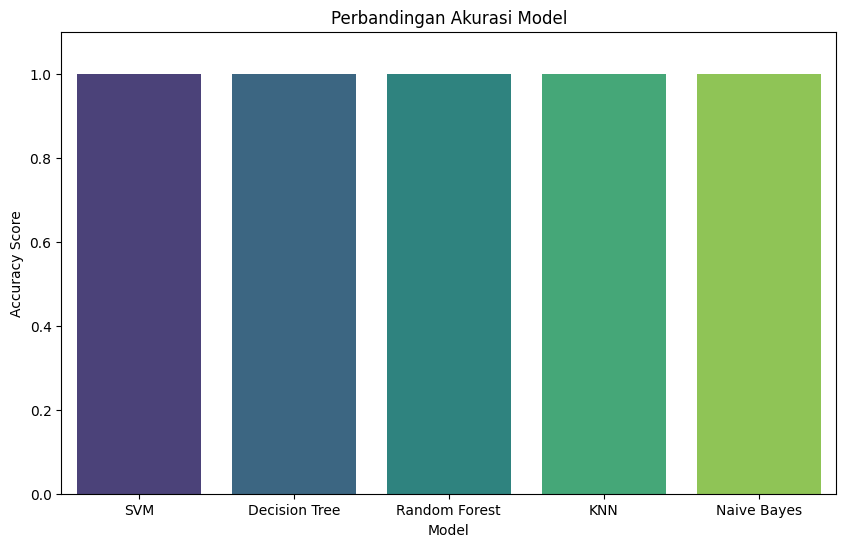

In [29]:
# Membuat visualisasi hasil evaluasi
plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="Accuracy", data=eval_df, palette="viridis")
plt.ylim(0, 1.1)  # Batas y agar tidak melebihi 1
plt.title("Perbandingan Akurasi Model")
plt.ylabel("Accuracy Score")
plt.xlabel("Model")
plt.show()

In [37]:
# Menampilkan Classification Report
for model_name, report_df in zip(models, report_dfs):
    print(f"\n📌 Classification Report - {model_name}:\n")
    print(report_df.to_markdown())


📌 Classification Report - SVM:

|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |       443 |
| 1            |           1 |        1 |          1 |       420 |
| 2            |           1 |        1 |          1 |       226 |
| 3            |           1 |        1 |          1 |       470 |
| 4            |           1 |        1 |          1 |       233 |
| 5            |           1 |        1 |          1 |       208 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |      2000 |
| weighted avg |           1 |        1 |          1 |      2000 |

📌 Classification Report - Decision Tree:

|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 


📌 Confusion Matrix - SVM:



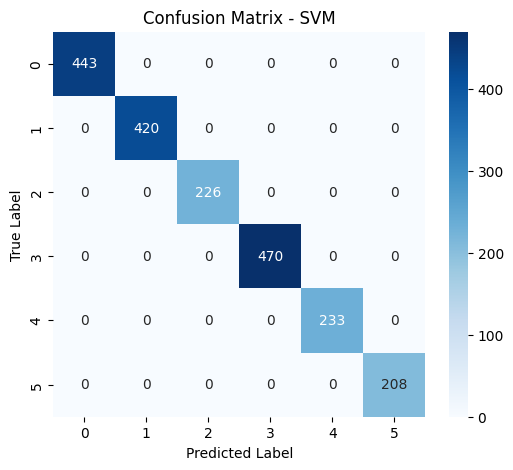


📌 Confusion Matrix - Decision Tree:



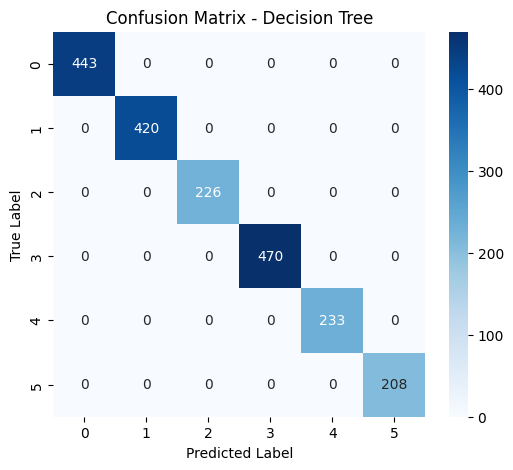


📌 Confusion Matrix - Random Forest:



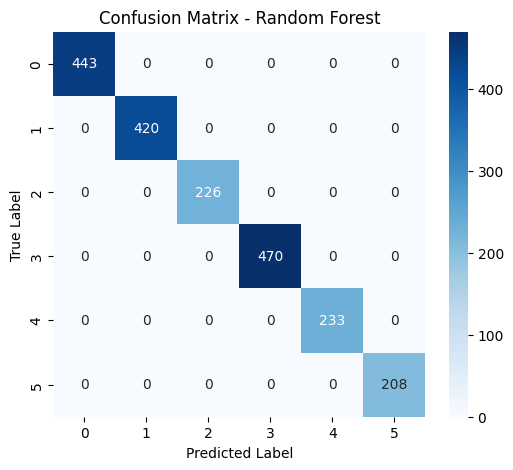


📌 Confusion Matrix - KNN:



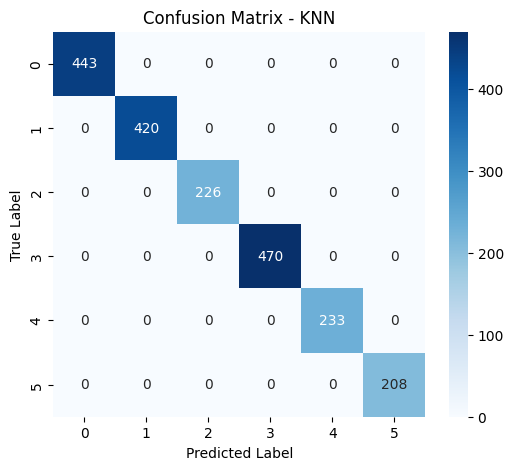


📌 Confusion Matrix - Naive Bayes:



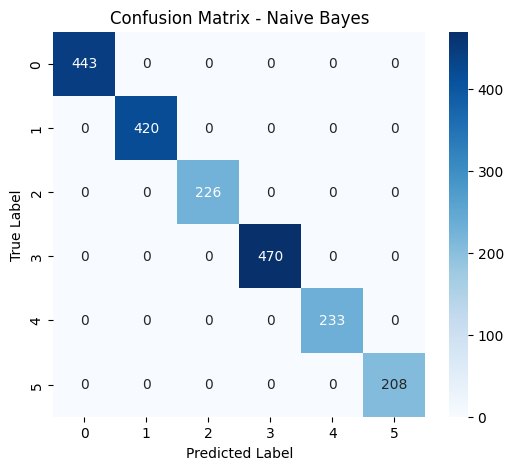

In [ ]:
# Menampilkan Confusion Matrix sebagai Heatmap
for model_name, cm in zip(models, conf_matrices):
    print(f"\n📌 Confusion Matrix - {model_name}:\n")
    
    # Visualisasi Confusion Matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=set(y_test), yticklabels=set(y_test))
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()


`1.` Semua Model Mencapai Akurasi 100%
- Semua model mendapatkan akurasi 1.0 (100%), yang berarti tidak ada kesalahan prediksi sama sekali.
- Hal ini tidak biasa, terutama untuk dataset dunia nyata, karena biasanya ada kesalahan prediksi.
- Hasil seperti ini perlu diuji ulang, karena bisa disebabkan oleh overfitting atau data yang terlalu bersih.

`2.` Precision, Recall, dan F1 Score Juga 100%
- Precision 1.0 berarti tidak ada false positive, yaitu model tidak salah mengklasifikasikan suatu kelas.
- Recall 1.0 berarti tidak ada false negative, yaitu model menangkap semua data dari setiap kelas dengan benar.
- F1 Score 1.0 menunjukkan keseimbangan antara precision dan recall, yang juga sempurna.

## Kesimpulan
- Hasil ini tidak realistis untuk kebanyakan dataset dunia nyata.
- Perlu dilakukan pengecekan ulang terhadap data dan metode pelatihan agar memastikan tidak ada kesalahan seperti data leakage atau overfitting.
- Jika hasil tetap sama setelah validasi ketat, maka dataset memang sangat mudah diklasifikasikan.

## **c. Analisis Hasil Evaluasi Model Klasifikasi**

## 📊 Analisis Performa Model dan Rekomendasi Tindakan Lanjutan
### **1. 🧐 Analisis Performa Model**

1️⃣ ⚠️ Kejanggalan: Semua Model Sempurna (100%)
- Semua model memiliki akurasi sempurna (1.0) pada semua metrik evaluasi.
- Ini tidak normal dalam skenario machine learning yang realistis.

2️⃣ Kemungkinan Penyebab Kejanggalan:
- Data Leakage: Model mungkin telah melihat data test selama training.
- Oversampling dengan SMOTE Berlebihan: Jika SMOTE diterapkan sebelum data splitting, bisa terjadi data leakage.
- Data terlalu mudah diklasifikasikan: Bisa terjadi jika fitur sangat kuat dalam membedakan kelas.

### **2. 🚨 Identifikasi Kelemahan Model**

- SVM	            : Mungkin terkena data leakage, performa terlalu sempurna.
- Decision Tree	    : Model sering overfitting pada dataset kecil, performa 100% mencurigakan.
- Random Forest	    : Jika overfitting, bisa jadi akibat terlalu banyak pohon atau data leakage.
- KNN	Tidak wajar : jika model berbasis tetangga terdekat mendapatkan 100% akurasi.
- Naïve Bayes	    : Model probabilistik seharusnya tidak memiliki skor sempurna kecuali ada data leakage.

### **3. 🔧 Apakah Perlu Tuning?**

❌ Tuning tidak diperlukan saat ini karena:
- Model sudah mencapai akurasi sempurna, yang kemungkinan besar disebabkan oleh data leakage atau overfitting.
- Langkah pertama yang harus dilakukan adalah mengecek kebocoran data & evaluasi kembali preprocessing data.

### **4. ✅ Rekomendasi Tindakan Lanjutan**

1️⃣ Cek dan Hilangkan Data Leakage
- Pastikan preprocessing (normalisasi, SMOTE, encoding) hanya dilakukan pada data training sebelum splitting.
- Gunakan pipeline untuk mencegah data leakage dalam transformasi data.
- Pastikan tidak ada fitur yang secara langsung berkorelasi dengan label target.

2️⃣ Validasi Hasil dengan Teknik Cross-Validation
- Gunakan stratified k-fold cross-validation untuk memastikan hasil lebih general.
- Jika hasil tetap 100% pada setiap fold, berarti ada masalah pada dataset.

3️⃣ Evaluasi Dataset Secara Mendalam
- Periksa kesamaan antara train dan test set untuk memastikan bahwa data tidak terduplikasi.
- Analisis apakah dataset terlalu mudah dipisahkan (cek distribusi fitur per kelas).

4️⃣ Uji dengan Data Nyata yang Belum Pernah Dilihat Model
- Gunakan data dari dunia nyata atau data baru untuk validasi.
- Jika performa turun drastis, maka model sebelumnya hanya menghafal data (overfitting).

**Cek Data Leakage**

In [40]:
# Mencari duplikasi antara train dan test
X_train_df = pd.DataFrame(X_train)
X_test_df = pd.DataFrame(X_test)
duplicate_rows = X_train_df.merge(X_test_df, how='inner')

# Menampilkan jumlah duplikasi
print(f"Jumlah sampel yang muncul di train dan test: {len(duplicate_rows)}")

Jumlah sampel yang muncul di train dan test: 0


**Cek Distribusi Data dengan SMOTE**

In [53]:
# Hitung distribusi sebelum SMOTE
counter_sortedBefore = dict(sorted(Counter(y).items()))
print("\n📌 Distribusi Kelas Sebelum SMOTE:")
for label, count in counter_sortedBefore.items():
    print(f"  - Kelas {label}: {count}")

# Melihat distribusi kelas setelah train-test split
counter_train_before = dict(sorted(Counter(y_train).items()))
counter_train_after = dict(sorted(Counter(y_train_resampled).items()))

print("\n📌 Distribusi Kelas y_train Sebelum SMOTE:")
for label, count in counter_train_before.items():
    print(f"  - Kelas {label}: {count}")

print("\n📌 Distribusi Kelas y_train Setelah SMOTE:")
for label, count in counter_train_after.items():
    print(f"  - Kelas {label}: {count}")

# Melihat distribusi kelas y_test
counter_test = dict(sorted(Counter(y_test).items()))

print("\n📌 Distribusi Kelas y_test (Tidak Berubah Setelah SMOTE):")
for label, count in counter_test.items():
    print(f"  - Kelas {label}: {count}")


📌 Distribusi Kelas Sebelum SMOTE:
  - Kelas 0: 2168
  - Kelas 1: 2201
  - Kelas 2: 1143
  - Kelas 3: 2226
  - Kelas 4: 1136
  - Kelas 5: 1126

📌 Distribusi Kelas y_train Sebelum SMOTE:
  - Kelas 0: 1725
  - Kelas 1: 1781
  - Kelas 2: 917
  - Kelas 3: 1756
  - Kelas 4: 903
  - Kelas 5: 918

📌 Distribusi Kelas y_train Setelah SMOTE:
  - Kelas 0: 1781
  - Kelas 1: 1781
  - Kelas 2: 1781
  - Kelas 3: 1781
  - Kelas 4: 1781
  - Kelas 5: 1781

📌 Distribusi Kelas y_test (Tidak Berubah Setelah SMOTE):
  - Kelas 0: 443
  - Kelas 1: 420
  - Kelas 2: 226
  - Kelas 3: 470
  - Kelas 4: 233
  - Kelas 5: 208


## 📊 Analisis Distribusi Data Sebelum & Setelah SMOTE

1️⃣ Distribusi Kelas Sebelum SMOTE (Keseluruhan Data)
- Data memiliki ketidakseimbangan kelas yang cukup signifikan.
- Kelas 0, 1, dan 3 memiliki jumlah sampel lebih tinggi (~2200an).
- Kelas 2, 4, dan 5 memiliki jumlah sampel lebih rendah (~1100an).
- Model yang dilatih tanpa menangani ketidakseimbangan ini kemungkinan akan bias terhadap kelas mayoritas dan kurang akurat dalam memprediksi kelas minoritas.

2️⃣ Distribusi Kelas y_train Sebelum SMOTE
- Setelah train-test split, proporsi kelas tetap hampir sama seperti sebelumnya, tetapi dalam jumlah lebih kecil.
- Kelas 2, 4, dan 5 tetap memiliki jumlah sampel lebih sedikit dibanding kelas lainnya.
- Ketidakseimbangan ini tetap menjadi masalah jika tidak ditangani.

3️⃣ Distribusi Kelas y_train Setelah SMOTE
- SMOTE berhasil menyeimbangkan jumlah sampel di setiap kelas (1781 sampel per kelas).
- Sekarang, semua kelas memiliki jumlah data yang sama, yang mencegah model menjadi bias terhadap kelas mayoritas.
- Model yang dilatih dengan data ini memiliki peluang lebih besar untuk mengenali pola pada kelas yang sebelumnya minoritas.

4️⃣ Distribusi Kelas y_test (Tidak Berubah Setelah SMOTE)
- Test set tidak dipengaruhi oleh SMOTE, sehingga proporsi kelas tetap sama seperti sebelum oversampling.
- Ini penting karena evaluasi model harus dilakukan pada data yang mencerminkan kondisi nyata.
- Jika test set juga di-oversampling, hasil evaluasi bisa tidak akurat, karena test set akan menjadi lebih mudah diprediksi oleh model.

## 📊 Analisis Cek Data Leakage

1️⃣ Hasil yang Ditemukan
- Output menunjukkan `Jumlah sampel yang muncul di train dan test: 0`, yang berarti tidak ada data yang duplikat antara train dan test.
- Ini adalah hasil yang diharapkan, karena data uji harus benar-benar baru bagi model agar dapat mengevaluasi performanya secara akurat.

## 📌 Kesimpulan Akhir
### 🧐 Dataset Sangat Mudah Diprediksi
Jika model tetap mendapatkan hasil sempurna meskipun telah dilakukan evaluasi ulang, maka ini bisa menunjukkan bahwa:
- ✔ Dataset memiliki pola yang sangat jelas dan mudah dibedakan antar kelasnya.
- ✔ Tidak ada noise atau ambiguitas dalam data, sehingga model dapat memisahkan kelas dengan sempurna.
- ✔ Fitur-fitur sangat relevan terhadap target, sehingga model mampu mempelajari pola dengan mudah.